In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
img = cv2.imread('./data/supra.jpeg').astype(np.float)
H, W, C = img.shape

In [16]:
# Grayscale
out = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
out = out.astype(np.uint8)

In [17]:
# Determine threshold of Otsu's binarization
max_sigma = 0
max_t = 0

In [29]:
for _t in range(1, 255):
    v0 = out[np.where(out < _t)]
    m0 = np.mean(v0) if len(v0) > 0 else 0.
    w0 = len(v0) / (H * W)
    v1 = out[np.where(out >= _t)]
    m1 = np.mean(v1) if len(v1) > 0 else 0.
    w1 = len(v1) / (H * W)
    sigma = w0 * w1 * ((m0 - m1) ** 2)
    if sigma > max_sigma:
        max_sigma = sigma
        max_t = _t

In [30]:
# Binarization
print("threshold >>", max_t)
th = max_t
out[out < th] = 0
out[out >= th] = 255

threshold >> 138


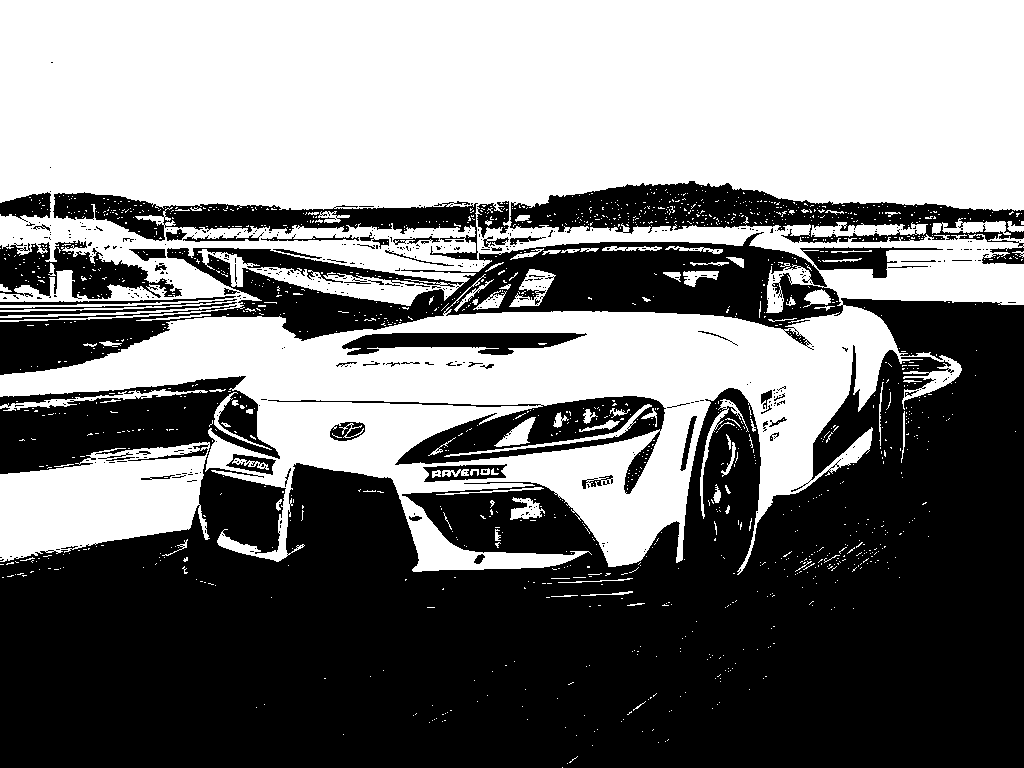

In [31]:
Image.fromarray(out)

In [32]:
cv2.imwrite('./data/out_BiOtsu.jpg', out)

True